# **Face Recognition Pipeline**

## Extract Frames

In [ ]:
import cv2
import os
import time

people = ["Đức", "Dương", "HĐức", "Hiếu", "Hùng", "Khôi", "Kiên", "Linh", "Quân", "Tâm", "Tân", "Thắng", 
"Trường", "Tuấn", "Vân", "Việt Đức", "Xuân Anh"]

count = 0

for person in people:
    time_start = time.time()
    cam = cv2.VideoCapture("./Video/" + person + ".mp4")
    video_length = int(cam.get(cv2.CAP_PROP_FRAME_COUNT))-1
    try:
        if not os.path.exists(person):
            os.makedirs(person)
    except OSError:
        print ('Error: Creating directory of data')
    currentframe = 0
    while(True):
        success, frame = cam.read()
        if success:
            # extract frame EVERY ONE SECOND
            cam.set(cv2.CAP_PROP_POS_MSEC,(currentframe*200))
            name = './' + person + '/frame' + str(currentframe) + '.png'
            cv2.imwrite(name, frame)
            currentframe += 1
            if (currentframe > (video_length-1)):
                time_end = time.time()
                cam.release()
                break
        else:
            break
    count += 1
    cam.release()
    
cv2.destroyAllWindows()

## Feature Extraction

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/

/content/drive/MyDrive


### Load Data

In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from imutils import paths
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from google.colab.patches import cv2_imshow
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import random
import os
import matplotlib.pyplot as plt

image_path = list(paths.list_images('face_data/'))

random.shuffle(image_path)

image_path

['face_data/Vân/frame7.png',
 'face_data/Linh/frame34.png',
 'face_data/Hùng/frame4.png',
 'face_data/Tân/frame5.png',
 'face_data/Quân/frame19.png',
 'face_data/Quân/frame16.png',
 'face_data/Đức/frame4.png',
 'face_data/Việt Đức/frame12.png',
 'face_data/HĐức/frame32.png',
 'face_data/Vân/frame29.png',
 'face_data/HĐức/frame42.png',
 'face_data/Vân/frame4.png',
 'face_data/Quân/frame9.png',
 'face_data/Tuấn/frame16.png',
 'face_data/Khôi/frame15.png',
 'face_data/Thắng/frame77.png',
 'face_data/Linh/frame29.png',
 'face_data/HĐức/frame13.png',
 'face_data/Vân/frame31.png',
 'face_data/Trình/frame22.png',
 'face_data/Thắng/frame1.png',
 'face_data/Tâm/frame21.png',
 'face_data/Tân/frame49.png',
 'face_data/Đức/frame41.png',
 'face_data/Việt Đức/frame11.png',
 'face_data/Việt Đức/frame30.png',
 'face_data/Linh/frame1.png',
 'face_data/Quân/frame5.png',
 'face_data/Khôi/frame11.png',
 'face_data/Dương/frame7.png',
 'face_data/Tuấn/frame33.p

In [ ]:
# face_datat/name_of_person/frame%d.png: 'face_data/Tuấn/frame3.png'
# p.split(os.path.sep)[-2] can extract the name of the person
names = [p.split(os.path.sep)[-2] for p in image_path]
names

['Vân',
 'Linh',
 'Hùng',
 'Tân',
 'Quân',
 'Quân',
 'Đức',
 'Việt Đức',
 'HĐức',
 'Vân',
 'HĐức',
 'Vân',
 'Quân',
 'Tuấn',
 'Khôi',
 'Thắng',
 'Linh',
 'HĐức',
 'Vân',
 'Trình',
 'Thắng',
 'Tâm',
 'Tân',
 'Đức',
 'Việt Đức',
 'Việt Đức',
 'Linh',
 'Quân',
 'Khôi',
 'Dương',
 'Tuấn',
 'Thắng',
 'Trình',
 'Trường',
 'Khôi',
 'Thắng',
 'Tuấn',
 'Thắng',
 'Khôi',
 'Hiếu',
 'Đức',
 'Trình',
 'Khôi',
 'Linh',
 'Hiếu',
 'Việt Đức',
 'Dương',
 'Dương',
 'Trình',
 'Tâm',
 'Thắng',
 'Hùng',
 'Trường',
 'Kiên',
 'Kiên',
 'Việt Đức',
 'Thắng',
 'Quân',
 'Trình',
 'Khôi',
 'Trường',
 'Dương',
 'Hùng',
 'Tân',
 'Trường',
 'Linh',
 'Hùng',
 'Tân',
 'Trình',
 'Hùng',
 'Xuân Anh',
 'Khôi',
 'Linh',
 'Vân',
 'Quân',
 'HĐức',
 'Hùng',
 'Xuân Anh',
 'Tâm',
 'Xuân Anh',
 'Xuân Anh',
 'Tân',
 'Đức',
 'HĐức',
 'Thắng',
 'Vân',
 'Kiên',
 'Tân',
 'Trường',
 'Xuân Anh',
 'Tân

In [ ]:
# Transform the name of each person to a number
le = LabelEncoder()
labels = le.fit_transform(names)
labels

# One-hot encoding
# lb = LabelBinarizer()
# labels = lb.fit_transform(labels)

array([14,  6,  2,  9,  7,  7, 17, 15,  3, 14,  3, 14,  7, 13,  4, 10,  6,
        3, 14, 11, 10,  8,  9, 17, 15, 15,  6,  7,  4,  0, 13, 10, 11, 12,
        4, 10, 13, 10,  4,  1, 17, 11,  4,  6,  1, 15,  0,  0, 11,  8, 10,
        2, 12,  5,  5, 15, 10,  7, 11,  4, 12,  0,  2,  9, 12,  6,  2,  9,
       11,  2, 16,  4,  6, 14,  7,  3,  2, 16,  8, 16, 16,  9, 17,  3, 10,
       14,  5,  9, 12, 16,  9,  8, 16,  5,  1, 13, 10,  2, 11, 10,  9, 10,
        6, 11,  4, 15, 16, 13,  9,  4, 15,  7, 13,  1,  8,  5, 15, 15, 13,
        1,  0,  8, 10,  9, 16, 15, 15,  2, 13,  1, 10, 12, 12,  0,  8, 12,
       13,  5,  8,  5,  3,  8,  7, 11,  4,  0,  0,  4,  2,  6, 11, 16,  8,
       14, 14,  9, 11,  6, 17, 17,  2,  0,  2, 16, 17, 15,  1,  6,  2,  0,
        3,  3,  1, 12, 11,  7, 16,  2, 14,  8,  7, 14,  8,  9,  1, 15,  4,
       13,  0,  8, 15,  8,  7, 16,  4, 12, 13,  8,  6, 17,  7,  4, 17,  5,
        5,  1,  2, 15,  7,  9,  2, 15,  2,  2, 12,  6,  1,  9, 17,  2,  0,
       15,  3, 13,  8, 14

In [ ]:
keys = labels
values = names
dict = {}
count = 0
for i in keys:
  dict[i] = values[count]
  count += 1
dict

{0: 'Dương',
 1: 'Hiếu',
 2: 'Hùng',
 3: 'HĐức',
 4: 'Khôi',
 5: 'Kiên',
 6: 'Linh',
 7: 'Quân',
 8: 'Tâm',
 9: 'Tân',
 10: 'Thắng',
 11: 'Trình',
 12: 'Trường',
 13: 'Tuấn',
 14: 'Vân',
 15: 'Việt Đức',
 16: 'Xuân Anh',
 17: 'Đức'}

### Detect, Crop & Align Data

In [ ]:
import argparse
import imutils
import time
import dlib
import cv2

def convert_and_trim_bb(image, rect):
  # extract the starting and ending (x, y)-coordinates of the
  # bounding box
  startX = rect.left()
  startY = rect.top()
  endX = rect.right()
  endY = rect.bottom()

  # ensure the bounding box coordinates fall within the spatial
  # dimensions of the image
  startX = max(0, startX)
  startY = max(0, startY)
  endX = min(endX, image.shape[1])
  endY = min(endY, image.shape[0])

  # compute the width and height of the bounding box
  w = endX - startX
  h = endY - startY
  
  # return our bounding box coordinates
  return (startX, startY, w, h)

In [ ]:
# load dlib's CNN face detector
detector = dlib.cnn_face_detection_model_v1('./Save_model/face_recognition/mmod_human_face_detector.dat')

resized_image_list = []
image_intensity = []

for image in image_path:
  # load the input image from disk and resize it
  image = cv2.imread(image)

  image_intensity.append(np.mean(image))

  resized_image = cv2.resize(image, (int(image.shape[1]/2), int(image.shape[0]/2)), interpolation = cv2.INTER_AREA)
  resized_image_list.append(resized_image)

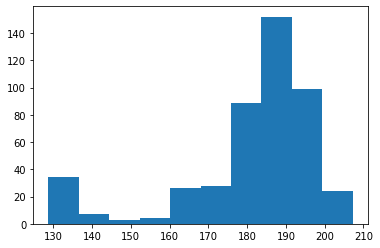

In [ ]:
plt.hist(image_intensity)
plt.show()

In [ ]:
new_image_list = []

for image in resized_image_list:
  # BGR to RGB channel ordering (which is what dlib expects)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # perform face detection using dlib's face detector
  results = detector(rgb, 1)

  boxes = [convert_and_trim_bb(image, r.rect) for r in results]

  crop_image = image

  # loop over the bounding boxes
  for (x, y, w, h) in boxes:
    # draw the bounding box on our image
    # cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    crop_image = image[y:y+h, x:x+w]
  
  new_image_list.append(crop_image)

In [ ]:
image_list = []
for image in new_image_list:
    resized_image = cv2.resize(image, (160,160), interpolation = cv2.INTER_AREA)
    resized_image = img_to_array(resized_image)
    
    resized_image = np.expand_dims(resized_image, 0) # convert to <numpy.ndarray>
    
    image_list.append(resized_image)
    
image_list = np.vstack(image_list) # convert to <numpy.ndarray> 
image_list.shape

(466, 160, 160, 3)

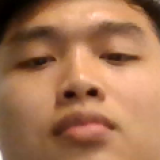

In [ ]:
cv2_imshow(image_list[10])

### Transfer Learning

In [ ]:
norm_image_list = []
for image in image_list:
  image = image.astype('float32')
  mean, std = image.mean(), image.std()
  image = (image - mean) / std

  norm_image_list.append(image)

norm_image_list = np.asarray(norm_image_list)
norm_image_list.shape

(466, 160, 160, 3)

In [ ]:
from keras.models import load_model
facenet = load_model('./Save_model/face_recognition/facenet_keras.h5')

features = facenet.predict(norm_image_list)
features.shape

(466, 128)

In [ ]:
# test_size = 0.2 => train = 80%, test = 20%
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=2021, stratify=labels)

In [ ]:
x_test.shape

(94, 128)

### Train

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l2')
x_train = normalizer.transform(x_train)
x_test = normalizer.transform(x_test)

In [ ]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=2021)
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=2021)

### Test

In [ ]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = random_forest.predict(x_test)
print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred_2 = decision_tree.predict(x_test)
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred_2))

Random Forest Accuracy: 0.9893617021276596
Decision Tree Accuracy: 0.8829787234042553


`support`: is **the number of actual occurrences of the class in the specified dataset**.

$=>$ Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       0.88      1.00      0.93         7
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         6
          17       1.00    

In [ ]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         8
           3       0.67      1.00      0.80         4
           4       0.62      0.71      0.67         7
           5       1.00      1.00      1.00         4
           6       0.67      0.80      0.73         5
           7       1.00      1.00      1.00         5
           8       1.00      0.43      0.60         7
           9       1.00      1.00      1.00         5
          10       0.75      0.75      0.75         4
          11       0.83      1.00      0.91         5
          12       1.00      0.75      0.86         4
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         6
          17       1.00    

In [ ]:
import joblib
joblib.dump(random_forest, "./Save_model/face_recognition/random_forest.joblib")

['./Save_model/face_recognition/random_forest.joblib']

In [ ]:
predict = random_forest.predict(x_test[8].reshape((1,-1)))
print(f'The predicted value is: {predict}')
print(f'The actual value is: {y_test[8]}')

The predicted value is: [16]
The actual value is: 16


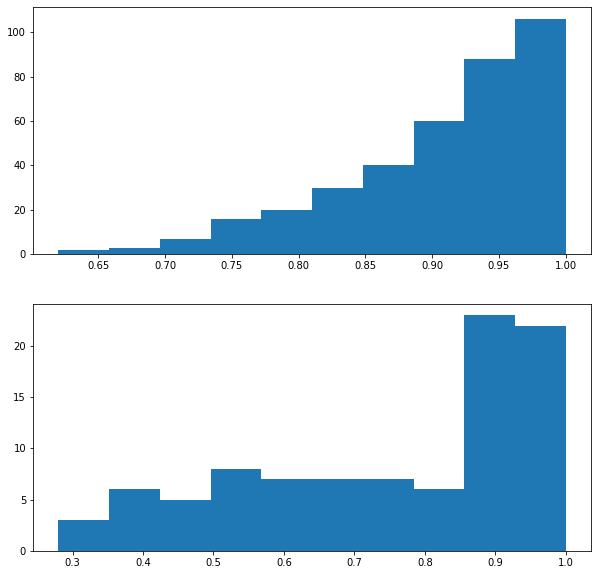

In [ ]:
import random
probs_test = random_forest.predict_proba(x_test)
probs_train = random_forest.predict_proba(x_train)

list_train = []
list_test = []
for prob in probs_train:
  list_train.append(prob.max())
for prob in probs_test:
  list_test.append(prob.max())

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.hist(list_train)
plt.subplot(2,1,2)
plt.hist(list_test)

plt.show()

### Customized Evaluation

In [ ]:
test_images = []
x_random = []
y_random = []
repeat_number = []

for i in range(20):
  index = np.random.choice(len(image_path))
  while index in repeat_number:
    index = np.random.choice(len(image_path))
    repeat_number.append(index)
  test_images.append(new_image_list[index])
  x_random.append(image_list[index])
  y_random.append(labels[index])

In [ ]:
test_norm_image_list = []
for image in x_random:
  image = image.astype('float32')
  mean, std = image.mean(), image.std()
  image = (image - mean) / std

  test_norm_image_list.append(image)

test_norm_image_list = np.asarray(test_norm_image_list)
test_norm_image_list.shape

(20, 160, 160, 3)

In [ ]:
features = facenet.predict(test_norm_image_list)
features = normalizer.transform(features)

In [ ]:
y_label = random_forest.predict(features)
predictions = random_forest.predict_proba(features)

In [ ]:
def plot_image(i, predictions, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

  predicted_label = np.argmax(predictions)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(dict[predicted_label],
                                100*np.max(predictions),
                                dict[true_label],
                                color=color))

def plot_value_array(i, predictions, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(18))
  plt.yticks([])
  thisplot = plt.bar(range(18), predictions, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

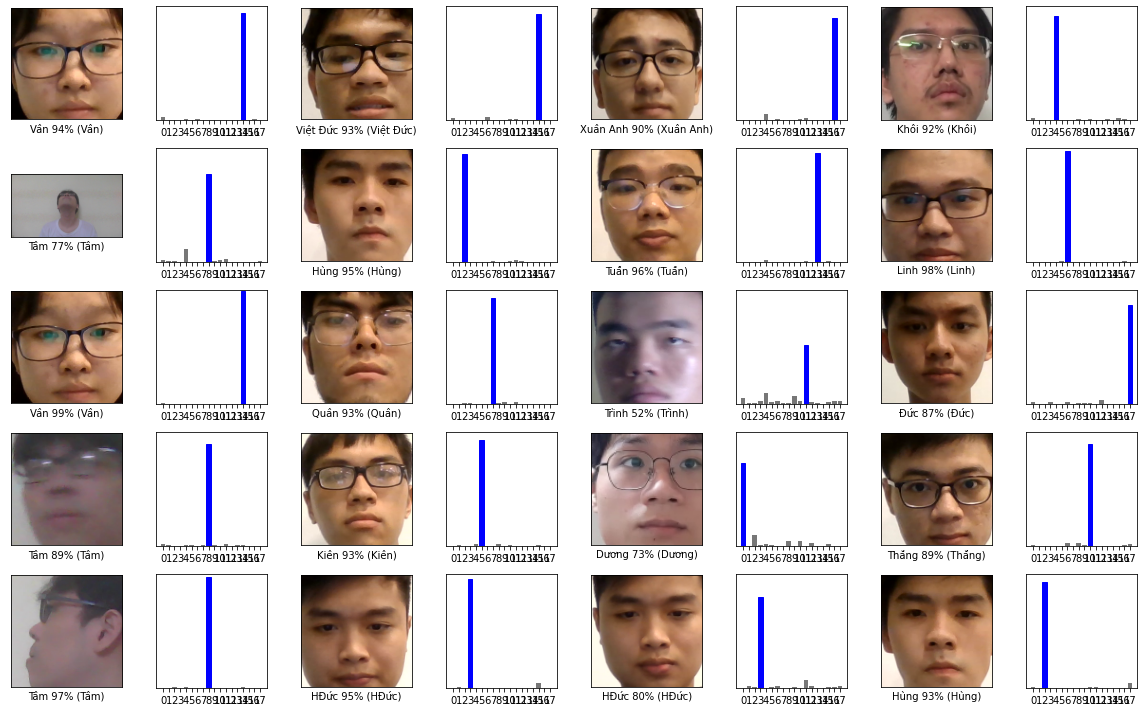

In [ ]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_random, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_random)
plt.tight_layout()
plt.show()

In [ ]:
class_names = []

for i in range(len(dict)):
  class_names.append(dict[i])

class_names

['Dương',
 'Hiếu',
 'Hùng',
 'HĐức',
 'Khôi',
 'Kiên',
 'Linh',
 'Quân',
 'Tâm',
 'Tân',
 'Thắng',
 'Trình',
 'Trường',
 'Tuấn',
 'Vân',
 'Việt Đức',
 'Xuân Anh',
 'Đức']

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
predictions_test = random_forest.predict_proba(x_test)

Confusion matrix, without normalization
[[4 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]]


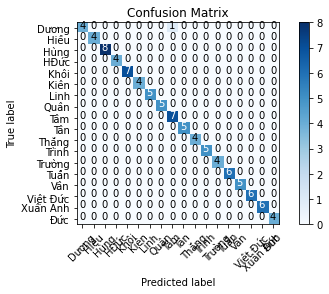

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, predictions_test.argmax(axis=1))
plot_confusion_matrix(cm=matrix, classes=class_names, title='Confusion Matrix')

## Predict New Image - **Evaluation**

### Detect, Crop & Align Data

In [ ]:
from tensorflow import keras
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from imutils import paths
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
# from tf.keras.optimizers import SGD
# from tf.keras.optimizers import RMSprop
# from tf.keras.optimizers import Adam
from keras.layers import Input, BatchNormalization
from keras.models import Model
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from google.colab.patches import cv2_imshow
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import random
import os
import matplotlib.pyplot as plt

**Define your path to your dataset and fill in the quotation mark below.**

In [ ]:
test_image = list(paths.list_images('test_data/')) # Path to the dataset

random.shuffle(test_image)

test_image

['test_data/Son_Tung.jpg',
 'test_data/Tâm.png',
 'test_data/Khôi.png',
 'test_data/Ronaldo.jpg',
 'test_data/Liam.jpg',
 'test_data/NhaPhuong.png',
 'test_data/Leonardo.jpg',
 'test_data/Dương.png',
 'test_data/Chiellini.jpg',
 'test_data/Hùng_1.png',
 'test_data/Kevin_Durant.jpg',
 'test_data/Trình.png',
 'test_data/Đức_2.png',
 'test_data/Linh_2.png',
 'test_data/Đức_1.png',
 'test_data/Linh_1.png',
 'test_data/Hùng_2.png',
 'test_data/Jennifer.jpg',
 'test_data/Quân.png',
 'test_data/Messi.jpg']

In [ ]:
identity = [p.split(os.path.sep)[-1] for p in test_image]
identity

['Son_Tung.jpg',
 'Tâm.png',
 'Khôi.png',
 'Ronaldo.jpg',
 'Liam.jpg',
 'NhaPhuong.png',
 'Leonardo.jpg',
 'Dương.png',
 'Chiellini.jpg',
 'Hùng_1.png',
 'Kevin_Durant.jpg',
 'Trình.png',
 'Đức_2.png',
 'Linh_2.png',
 'Đức_1.png',
 'Linh_1.png',
 'Hùng_2.png',
 'Jennifer.jpg',
 'Quân.png',
 'Messi.jpg']

Download the required file to use for **dlib-library**: http://arunponnusamy.com/files/mmod_human_face_detector.dat

Then *define the path to this file in the quotation mark below*.

In [ ]:
import argparse
import imutils
import time
import dlib
import cv2

def convert_and_trim_bb(image, rect):
  # extract the starting and ending (x, y)-coordinates of the
  # bounding box
  startX = rect.left()
  startY = rect.top()
  endX = rect.right()
  endY = rect.bottom()

  # ensure the bounding box coordinates fall within the spatial
  # dimensions of the image
  startX = max(0, startX)
  startY = max(0, startY)
  endX = min(endX, image.shape[1])
  endY = min(endY, image.shape[0])

  # compute the width and height of the bounding box
  w = endX - startX
  h = endY - startY
  
  # return our bounding box coordinates
  return (startX, startY, w, h)

# load dlib's CNN face detector
detector = dlib.cnn_face_detection_model_v1('./Save_model/face_recognition/mmod_human_face_detector.dat') # ! DEFINE THE PATH HERE !

new_image_list = []
resized_image_list = []

for image in test_image:
  # load the input image from disk, resize it, and convert it from
  image = cv2.imread(image)
  resized_image = cv2.resize(image, (int(image.shape[1]/2),int(image.shape[0]/2)), interpolation = cv2.INTER_AREA)
  resized_image_list.append(resized_image)

In [ ]:
for image in resized_image_list:
  # BGR to RGB channel ordering (which is what dlib expects)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # perform face detection using dlib's face detector
  results = detector(rgb, 1)

  boxes = [convert_and_trim_bb(image, r.rect) for r in results]

  # loop over the bounding boxes
  for (x, y, w, h) in boxes:
    crop_image = image[y:y+h, x:x+w]
  
  new_image_list.append(crop_image)

In [ ]:
image_list = []
for image in new_image_list:
    resized_image = cv2.resize(image, (160,160), interpolation = cv2.INTER_AREA)
    resized_image = img_to_array(resized_image)
    
    resized_image = np.expand_dims(resized_image, 0) # convert to <numpy.ndarray>
    
    image_list.append(resized_image)
    
image_list = np.vstack(image_list) # convert to <numpy.ndarray>
image_list.shape

(20, 160, 160, 3)

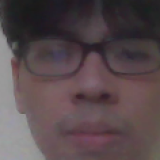

In [ ]:
cv2_imshow(image_list[1])

### Transfer Learning

In [ ]:
norm_image_list = []
for image in image_list:
  image = image.astype('float32')
  mean, std = image.mean(), image.std()
  image = (image - mean) / std

  norm_image_list.append(image)

norm_image_list = np.asarray(norm_image_list)
norm_image_list.shape

(20, 160, 160, 3)

Download the pre-trained **FaceNet** model at: https://drive.google.com/drive/folders/12aMYASGCKvDdkygSv1yQq8ns03AStDO_?usp=sharing

In [ ]:
from keras.models import load_model
facenet = load_model('./Save_model/face_recognition/facenet_keras.h5')

features = facenet.predict(norm_image_list)
features.shape

(20, 128)

### Prediction

In [ ]:
dict = {
    0: 'Dương',
    1: 'Hiếu',
    2: 'Hùng',
    3: 'HĐức',
    4: 'Khôi',
    5: 'Kiên',
    6: 'Linh',
    7: 'Quân',
    8: 'Tâm',
    9: 'Tân',
    10: 'Thắng',
    11: 'Trình',
    12: 'Trường',
    13: 'Tuấn',
    14: 'Vân',
    15: 'Việt Đức',
    16: 'Xuân Anh',
    17: 'Đức'}

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l2')
features = normalizer.transform(features)

In [ ]:
probs = random_forest.predict_proba(features)

Unknown
Son_Tung.jpg


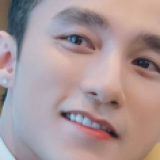



Tâm
Tâm.png


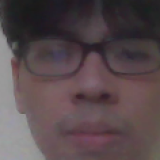



Khôi
Khôi.png


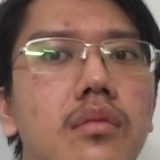



Unknown
Ronaldo.jpg


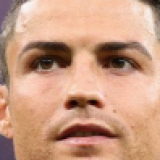



Unknown
Liam.jpg


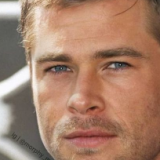



Unknown
NhaPhuong.png


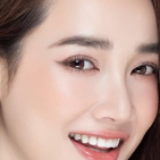



Unknown
Leonardo.jpg


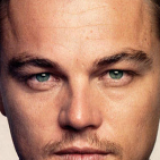



Dương
Dương.png


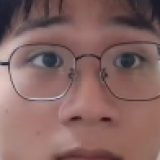



Unknown
Chiellini.jpg


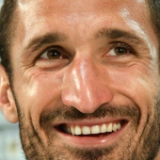



Hùng
Hùng_1.png


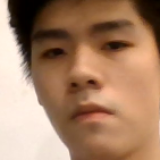



Unknown
Kevin_Durant.jpg


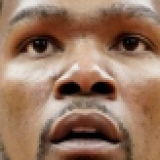



Trình
Trình.png


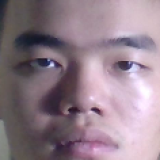



Đức
Đức_2.png


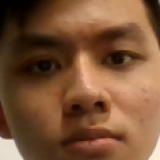



Linh
Linh_2.png


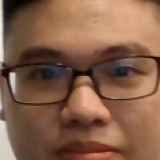



Đức
Đức_1.png


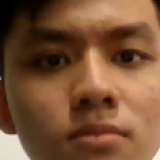



Linh
Linh_1.png


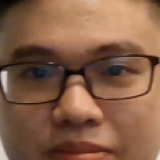



Hùng
Hùng_2.png


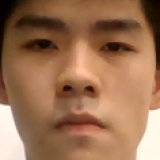



Unknown
Jennifer.jpg


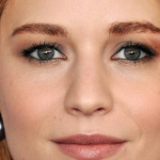



Unknown
Quân.png


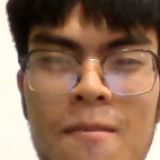



Unknown
Messi.jpg


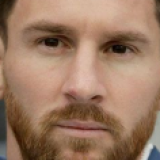

In [ ]:
threshold = 0.65
count = 0
for prob in probs:
  if prob.max() < threshold:
    print('Unknown')
  else:
    print(dict[np.argmax(prob)])
  print(identity[count])
  cv2_imshow(image_list[count])
  print('\n')
  count += 1